In [1]:
import sys
sys.path.insert(1, '../')

from Utils import *
from modeling import *

In [110]:
data = pd.read_csv('output/results_ensemble.csv', 
                   names = ['N', 'n_train', 'n_swap', 'd', 'balanced', 
                            'test_size', 'dev', 'accuracy', 'brier', 'seed'])

data = data.loc[ data['N']==200 , : ]
data = data.loc[ data['test_size']==0.1, : ]
# data = data.loc[ data['dev']!=0.15, : ]
# data = data.loc[ data['dev']!=0.25, : ]
#data = data.loc[ data['dev']==0.3, : ]
#data = data.loc[ data['d']!=1, : ]

ctrl_size = data.d.unique()
std_all = data.dev.unique()

In [116]:
data_mean =data.groupby(['d', 'dev']).mean()
data_std =data.groupby(['d', 'dev']).std()


data_mean

N  n_train  n_swap  test_size  accuracy     brier        seed
d dev                                                                    
1 0.10  200.0      2.0     1.0        0.1  1.000000  0.155351  644.000000
  0.15  200.0      2.0     1.0        0.1  1.000000  0.157995  644.000000
  0.20  200.0      2.0     1.0        0.1  0.925000  0.164795  644.000000
  0.25  200.0      2.0     1.0        0.1  0.900000  0.170027  644.000000
  0.30  200.0      2.0     1.0        0.1  0.875000  0.184367  644.000000
2 0.10  200.0      4.0     1.0        0.1  1.000000  0.161743  465.000000
  0.15  200.0      4.0     1.0        0.1  0.900000  0.168747  465.000000
  0.20  200.0      4.0     1.0        0.1  0.837500  0.177476  465.000000
  0.25  200.0      4.0     1.0        0.1  0.775000  0.185533  465.000000
  0.30  200.0      4.0     1.0        0.1  0.737500  0.199614  465.000000
3 0.10  200.0      8.0     1.0        0.1  1.000000  0.164779  465.000000
  0.15  200.0      8.0     1.0        0.1  0.937500  0.173035  465.000000
  0.20  200.0      8.0     1.0        0.1  0.875000  0.183685  465.000000
  0.25  200.0      8.0     1.0        0.1  0.812500  0.196802  465.000000
  0.30  200.0      8.0     1.0        0.1  0.762500  0.211583  465.000000
4 0.10  200.0      8.0     1.0        0.1  1.000000  0.159910  465.000000
  0.15  200.0      8.0     1.0        0.1  0.987500  0.162534  465.000000
  0.20  200.0      8.0     1.0        0.1  0.850000  0.174058  617.666667
  0.25  200.0      8.0     1.0        0.1  0.783333  0.185728  617.666667
  0.30  200.0      8.0     1.0        0.1  0.783333  0.196954  617.666667

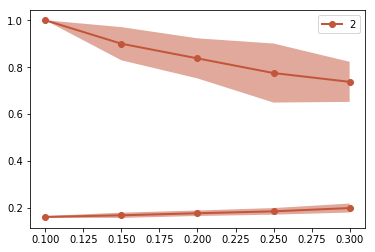

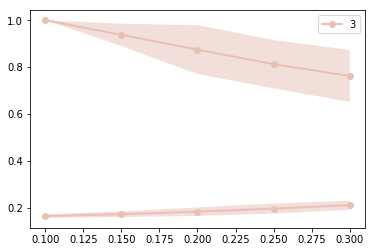

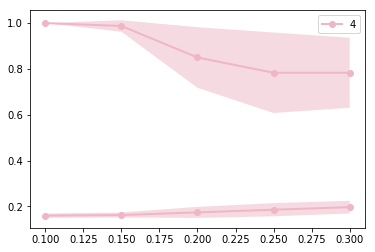

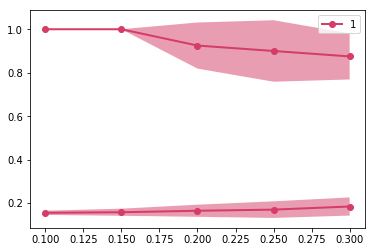

In [121]:
colors = sns.diverging_palette(20, 1, n=len(ctrl_size))

for d,c in zip(ctrl_size, colors):
    fig, ax = plt.subplots(1)
    
    mean_data = data_mean.loc[[d]]
    std_data = data_std.loc[[d]]
    
    x = mean_data.index.levels[1]
    
    # Accuracy
    y_mean = mean_data.accuracy   
    y_std = std_data.accuracy
    lower = y_mean - y_std
    upper = y_mean + y_std

    ax.plot(x, y_mean, lw=2, label = str(d), color=c, marker='o')
    ax.fill_between(x, upper, lower, facecolor=c, alpha=0.5)
    
    plt.legend()
    # Brier score
    y_mean = mean_data.brier
    y_std = std_data.brier
    lower = y_mean - y_std
    upper = y_mean + y_std

    ax.plot(x, y_mean, lw=2, label = None, color=c, marker='o')
    ax.fill_between(x, upper, lower, facecolor=c, alpha=0.5)
    
    plt.show()


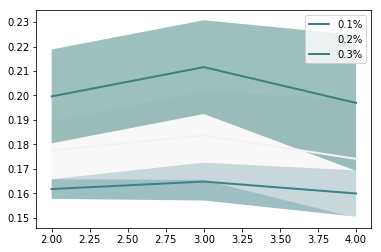

In [94]:
colors = sns.diverging_palette(200, 180, n=len(std_all))
fig, ax = plt.subplots(1)

for std,c in zip(std_all, colors):
    mean_data = data_mean.loc[[std]]
    x = mean_data.index.levels[1]

    y_mean = mean_data.brier

    std_data = data_std.loc[[std]]
    y_std = std_data.brier

    lower = y_mean - y_std
    upper = y_mean + y_std
    ax.plot(x, y_mean, lw=2, label = str(std)+'%', color=c)
    ax.fill_between(x, upper, lower, facecolor=c, alpha=0.5)
plt.legend()


In [26]:
data_std =data.groupby(['n_train', 'd', 'dev']).std()
data_std.accuracy

n_train  d  dev 
2        1  0.10    0.000000
            0.15    0.000000
            0.20    0.106066
            0.25    0.141421
            0.30    0.106066
4        2  0.10    0.000000
            0.15    0.070711
            0.20    0.085391
            0.25    0.125831
            0.30    0.085391
8        3  0.10    0.000000
            0.15    0.047871
            0.20    0.104083
            0.25    0.103078
            0.30    0.110868
         4  0.10    0.000000
            0.15    0.025000
            0.20    0.132288
            0.25    0.175594
            0.30    0.152753
Name: accuracy, dtype: float64

In [ ]:
d = data.d.unique()
B = data.B.unique()
std = [.05,.1, 15,.2, .25, .30]

In [ ]:
plt.plot(data.loc[data.dev==.1, 'd'], data.loc[data.dev==.1, 'accuracy'], color='skyblue',  linewidth=2, marker='o', label='0.10')
plt.plot(data.loc[data.dev==.15, 'd'], data.loc[data.dev==.15, 'accuracy'], color='green', linewidth=2, marker='o', label='0.15')
plt.plot(data.loc[data.dev==.2, 'd'], data.loc[data.dev==.2, 'accuracy'], color='orange', linewidth=3, marker='o', label='0.20')
plt.plot(data.loc[data.dev==.25, 'd'], data.loc[data.dev==.25, 'accuracy'], color='tomato', linewidth=2, marker='o',label="25")
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('d')
plt.xticks([1,2,3,4])
plt.grid(alpha=.3)
plt.savefig('output/accuracy.png', dpi=300)

In [ ]:
plt.plot(data.loc[data.dev==.1, 'd'], data.loc[data.dev==.1, 'brier'], color='skyblue',  linewidth=2, marker='o', label='0.10')
plt.plot(data.loc[data.dev==.15, 'd'], data.loc[data.dev==.15, 'brier'], color='green', linewidth=2, marker='o', label='0.15')
plt.plot(data.loc[data.dev==.2, 'd'], data.loc[data.dev==.2, 'brier'], color='orange', linewidth=3, marker='o', label='0.20')
plt.plot(data.loc[data.dev==.25, 'd'], data.loc[data.dev==.25, 'brier'], color='tomato', linewidth=2, marker='o',label="0.25")
plt.legend(loc=0)
plt.ylabel('Brier score')
plt.xlabel('d')
plt.xticks([1,2,3,4])
plt.grid(alpha=.3)
plt.savefig('output/brier_score.png', dpi=300)

In [64]:
import seaborn as sns

def plot_ensemble_results(data, palette=[220,10], y_name='accuracy', 
                          stds = [0.10, .15, 0.20, .25, 0.30],
                          filename='ensemble_performance.png'):
    
    # stds = np.array([0.10, .15, 0.20, .25, 0.30])
    colors = sns.diverging_palette(220, 10, n=5)

    fig, ax = plt.subplots(1)
    for i in np.arange(len(stds)):
        std= stds[i]
        color = colors[i]
        y = data.loc[data.dev==std, y_name]
        x = data.loc[data.dev==std, 'd']
        #plt.plot(x, y, color='blue',  linewidth=2)
        ax.plot(x,y, lw=2, label = std, color=color)
        # ax.fill_between(q, mean + upper, mean - lower, facecolor=color, alpha=0.5)
        # mean = ((1+ro[1]*(T-1))/T)*err
        # lower = mean - ((1+ro[0]*(T-1))/T)*err
        # upper = ((1 + ro[2] * (T - 1)) / T) * err - mean
        #ax.set_title(r'random walkers empirical $\mu$ and $\pm \sigma$ interval')
    ax.set_title('Quantum Bagging performance')
    ax.legend(loc='lower right', title = '$Std$')
    ax.set_xlabel('Number of control qubits ($d$)')
    ax.set_ylabel(y_name)
    ax.grid(alpha=0.3)
    ax.legend(bbox_to_anchor=(1.01, 1.05), title = '$Std$')
    plt.savefig('output/' + filename, dpi =300)
    plt.show()

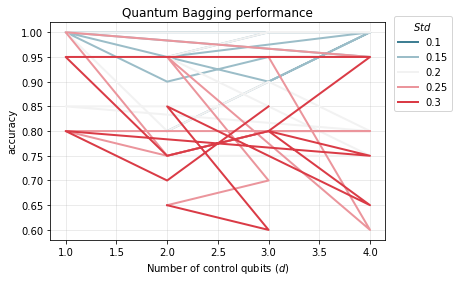

In [65]:
plot_ensemble_results(data, palette=[220,10], y_name='accuracy', 
                          stds = [0.10, .15, 0.20, .25, 0.30],
                          filename='acc_ensemble_performance.png')

In [ ]:
plot_ensemble_results(data, palette=[220,10], y_name='brier', 
                          stds = [0.10, .15, 0.20, .25, 0.30],
                          filename='brier_ensemble_performance.png')